In [2]:
import json
import _pickle as cPickle

class InputInstance(object):
    """A single training/test example for simple sequence classification."""

    def __init__(self, guid, text_a, text_b=None, label=None, score=None, img_key=None, q_id=None):
        """Constructs a InputExample.
        Args:
            guid: Unique id for the example.
            text_a: string. The untokenized text of the first sequence. For single
            sequence tasks, only this sequence must be specified.
            text_b: (Optional) string. The untokenized text of the second sequence.
            Only must be specified for sequence pair tasks.
            label: (Optional) string. The label of the example. This should be
            specified for train and dev examples, but not for test examples.
        """

        self.guid = guid
        self.text_a = text_a
        self.text_b = text_b
        self.label = label
        self.score = score
        self.img_key = img_key
        self.q_id = q_id

class DataProcessor(object):
    """Base class for data converters for sequence classification data sets."""

    def get_train_examples(self, data_dir):
        """Gets a collection of `InputExample`s for the train set."""
        raise NotImplementedError()

    def get_dev_examples(self, data_dir):
        """Gets a collection of `InputExample`s for the dev set."""
        raise NotImplementedError()

    def get_labels(self):
        """Gets the list of labels for this data set."""
        raise NotImplementedError()

    @classmethod
    def _read_tsv(cls, input_file, quotechar=None):
        """Reads a tab separated value file."""
        with open(input_file, "r", encoding="utf-8-sig") as f:
            reader = csv.reader(f, delimiter="\t", quotechar=quotechar)
            lines = []
            for line in reader:
                if sys.version_info[0] == 2:
                    line = list(unicode(cell, 'utf-8') for cell in line)
            return lines

class VQATextAProcessor(DataProcessor):
    """ Processor for the VQA Text data set. """

    def get_train_examples(self, data_dir, file_name='train2014_qla.json'):
        """ See base class."""

        lines = json.load(open(os.path.join(data_dir, file_name)))
        return self._create_examples(lines, "train")

        #return self._create_examples(self._read_tsv(os.path.join(data_dir, "train2014_qla.tsv")), "train")

    def get_dev_examples(self, data_dir, file_name='val2014_qla.json'):
        """ See base class."""

        lines = json.load(open(os.path.join(data_dir, file_name)))
        return self._create_examples(lines, "dev")

        #return self._create_examples(self._read_tsv(os.path.join(data_dir, "val2014_qla.tsv")), "dev")

    def get_test_examples(self, data_dir, file_name='test2015_qla.json'):
        """ See base class."""

        lines = json.load(open(os.path.join(data_dir, file_name)))
        return self._create_examples(lines, "test")

    def get_labels(self, label_file):
        """ See base class."""

        ans2label = cPickle.load(open(label_file, 'rb'))
        return list(ans2label.values())

    def _create_examples(self, lines, set_type):
        """Creates examples for the training and dev sets."""

        examples = []
        for (i, line) in enumerate(lines):
            if set_type!='test' and len(line['an']) == 0: continue

            guid = "%s-%s" % (set_type, str(i))
            text_a = line['q']
            text_b = None # line['o'] # or None
            label = None if set_type.startswith('test') else line['an']
            score = None if set_type.startswith('test') else line['s']
            img_key = line['img_id']
            q_id = int(line['q_id']) if set_type.startswith('test') else 0
            examples.append(InputInstance(guid=guid, text_a=text_a, text_b=text_b, label=label, score=score, img_key=img_key, q_id=q_id))
        return examples

In [ ]:
vqa_processor = VQATextAProcessor()
vqa_processor.get_labels('./cache/trainval_ans2label.pkl')

In [ ]:
import _pickle as cPickle

label2ans = cPickle.load(open("./cache/trainval_label2ans.pkl", 'rb'))
print(len(label2ans))
list(label2ans)

In [ ]:

ans2label = cPickle.load(open("./cache/trainval_ans2label.pkl", 'rb'))
print(len(ans2label))
list(ans2label)

In [2]:
import _pickle as cPickle
train_target = cPickle.load(open("./cache/val_target.pkl", 'rb'))
train_target

[{'question_id': 'val_0',
  'image': 'VizWiz_val_00000000.jpg',
  'labels': [11, 1049],
  'scores': [1, 0.33333],
  'occurances': [8, 1]},
 {'question_id': 'val_1',
  'image': 'VizWiz_val_00000001.jpg',
  'labels': [40, 2750, 734],
  'scores': [0.33333, 0.66666, 1],
  'occurances': [1, 2, 5]},
 {'question_id': 'val_2',
  'image': 'VizWiz_val_00000002.jpg',
  'labels': [],
  'scores': [],
  'occurances': []},
 {'question_id': 'val_3',
  'image': 'VizWiz_val_00000003.jpg',
  'labels': [183, 325, 425],
  'scores': [1, 0.33333, 0.33333],
  'occurances': [5, 1, 1]},
 {'question_id': 'val_4',
  'image': 'VizWiz_val_00000004.jpg',
  'labels': [11],
  'scores': [1],
  'occurances': [8]},
 {'question_id': 'val_5',
  'image': 'VizWiz_val_00000005.jpg',
  'labels': [2750, 345, 1563],
  'scores': [0.99999, 0.33333, 0.99999],
  'occurances': [3, 1, 3]},
 {'question_id': 'val_6',
  'image': 'VizWiz_val_00000006.jpg',
  'labels': [2750, 11],
  'scores': [1, 0.99999],
  'occurances': [7, 3]},
 {'quest

In [ ]:
import pickle5
val36_imgid2idx = pickle5.load(open("./imgids/val36_imgid2idx.pkl", 'rb'))
print(val36_imgid2idx)
print(len(val36_imgid2idx))

# 创建 Oscar 数据集

ans2label： 已有

label2ans: 已有

pt: tsv -> pt

json

- imgids: 得到imgid
- cache/train_taget: 得到question_id, occurance, label, 和 score
- - Annotations/train.json： 根据question_id 得到 question
- - Bottom-up-features： 得到 objects

In [24]:
import h5py
import pickle5

val36_imgid2idx = pickle5.load(open("./imgids/val36_imgid2idx.pkl", 'rb'))
val36_imgid2idx

hf_file = h5py.File("./Bottom-up-features-fixed/val36.hdf5", "r")
features = hf_file.get("image_features")
bboxes = hf_file.get("image_bb")

print(features[val36_imgid2idx['VizWiz_val_00000000']])
print(bboxes)

[[1.16679445e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  2.42774576e-01 0.00000000e+00]
 [3.18677016e-02 0.00000000e+00 2.85486622e-05 ... 0.00000000e+00
  1.23054422e-01 0.00000000e+00]
 [6.53482974e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  2.88691688e-02 1.39027657e-02]
 ...
 [0.00000000e+00 2.25428954e-01 0.00000000e+00 ... 1.51216006e-02
  6.90801620e-01 3.78190339e-01]
 [0.00000000e+00 1.08077502e+00 0.00000000e+00 ... 0.00000000e+00
  7.95690298e-01 1.56443357e+00]
 [0.00000000e+00 1.07062861e-01 2.02546511e-02 ... 1.36443432e-02
  8.90361547e-01 2.14548931e-01]]
<HDF5 dataset "image_bb": shape (7750, 36, 4), type "<f4">


In [1]:
import logging
import os
import os.path as op

def generate_lineidx_file(filein, idxout):
    idxout_tmp = idxout + '.tmp'
    with open(filein, 'r') as tsvin, open(idxout_tmp,'w') as tsvout:
        fsize = os.fstat(tsvin.fileno()).st_size
        fpos = 0
        while fpos!=fsize:
            tsvout.write(str(fpos)+"\n")
            tsvin.readline()
            fpos = tsvin.tell()
    os.rename(idxout_tmp, idxout)

class TSVFile(object):
    def __init__(self, tsv_file, generate_lineidx=False):
        self.tsv_file = tsv_file
        self.lineidx = op.splitext(tsv_file)[0] + '.lineidx'
        self._fp = None
        self._lineidx = None
        # the process always keeps the process which opens the file. 
        # If the pid is not equal to the currrent pid, we will re-open the file.
        self.pid = None
        # generate lineidx if not exist
        if not op.isfile(self.lineidx) and generate_lineidx:
            generate_lineidx_file(self.tsv_file, self.lineidx)

    def __del__(self):
        if self._fp:
            self._fp.close()

    def __str__(self):
        return "TSVFile(tsv_file='{}')".format(self.tsv_file)

    def __repr__(self):
        return str(self)

    def num_rows(self):
        self._ensure_lineidx_loaded()
        return len(self._lineidx)

    def seek(self, idx):
        self._ensure_tsv_opened()
        self._ensure_lineidx_loaded()
        try:
            pos = self._lineidx[idx]
        except:
            logging.info('{}-{}'.format(self.tsv_file, idx))
            raise
        self._fp.seek(pos)
        return [s.strip() for s in self._fp.readline().split('\t')]

    def seek_first_column(self, idx):
        self._ensure_tsv_opened()
        self._ensure_lineidx_loaded()
        pos = self._lineidx[idx]
        self._fp.seek(pos)
        print(self._fp)
        return read_to_character(self._fp, '\t')

    def __getitem__(self, index):
        return self.seek(index)

    def __len__(self):
        return self.num_rows()

    def _ensure_lineidx_loaded(self):
        if self._lineidx is None:
            logging.info('loading lineidx: {}'.format(self.lineidx))
            with open(self.lineidx, 'r') as fp:
                self._lineidx = [int(i.strip()) for i in fp.readlines()]

    def _ensure_tsv_opened(self):
        if self._fp is None:
            self._fp = open(self.tsv_file, 'r')
            self.pid = os.getpid()

        if self.pid != os.getpid():
            logging.info('re-open {} because the process id changed'.format(self.tsv_file))
            self._fp = open(self.tsv_file, 'r')
            self.pid = os.getpid()

# 保存训练集特征

In [2]:
import os
import json
import pickle5
import numpy as np
import pandas as pd
import base64
from PIL import Image
from matplotlib import pyplot as plt

import cv2
import torch

from tqdm import tqdm

train36_imgid2idx = pickle5.load(open("./imgids/train36_imgid2idx.pkl", 'rb'))
train_target = pickle5.load(open("./cache/train_target.pkl", 'rb'))
with open("./Annotations/train.json", "r") as f:
    train_ann = json.load(f)
    
train_features = TSVFile("./SG-Bottom-up-features/train_features.tsv")
train_labels = TSVFile("./SG-Bottom-up-features/train_labels.tsv")


# print(val36_imgid2idx)
print(len(train_ann))
print(len(train_target))
print(len(train_features))
assert len(train_target) == len(train_ann) 

print(train_target[0])
print("="*50)
print(train_ann[0])
print("="*50)

features = {}
output_json = []

for i in tqdm(range(len(train_target))):
    img_vis = Image.open(os.path.join("/home/datasets/VizWiz/train", train_target[i]['image']))
    # print(os.path.join("/home/datasets/VizWiz/val", val_target[i]['image']))
    img_id = train36_imgid2idx[train_target[i]['image'].split('.')[0]]
    unit = {
        'q' : train_ann[i]['question'],
        'o' : '',
        'an' : train_target[i]['labels'],
        's' : train_target[i]['scores'],
        'img_id' : img_id
    }
    # print(val_features.seek(i))
    img_name_feature, feature_num, feature = train_features.seek(i) 
    feature = eval(feature)
    feature = base64.b64decode(feature)
    feature = torch.tensor(np.frombuffer(feature, np.float32).reshape(int(feature_num), -1))
    # print(feature.shape)
    
    features[img_id] = feature
    
    img_name_label, label = train_labels.seek(i)
    label = eval(label)
    # print(label)
    
    for obj in label['objects']:
        unit['o'] += obj['class'] + ' '
        
    unit['o'] = unit['o'].strip()   
    # plt.imshow(img_vis)
    # print(unit)
    # print(features)
    # plt.show()
    # if i>=5:
    #     break
    output_json.append(unit)

with open("./SG-Bottom-up-features/train.json", "w") as f:
    json.dump(output_json, f)
    
torch.save(features, "./SG-Bottom-up-features/train_features.pt") 

20523
20523
23954
{'question_id': 'train_0', 'image': 'VizWiz_train_00000000.jpg', 'labels': [0], 'scores': [0.99999], 'occurances': [3]}
{'image': 'VizWiz_train_00000000.jpg', 'question': "What's the name of this product?", 'answers': [{'answer_confidence': 'yes', 'answer': 'basil leaves'}, {'answer_confidence': 'yes', 'answer': 'basil leaves'}, {'answer_confidence': 'yes', 'answer': 'basil'}, {'answer_confidence': 'yes', 'answer': 'basil'}, {'answer_confidence': 'yes', 'answer': 'basil leaves'}, {'answer_confidence': 'yes', 'answer': 'basil leaves'}, {'answer_confidence': 'yes', 'answer': 'basil leaves'}, {'answer_confidence': 'yes', 'answer': 'basil leaves'}, {'answer_confidence': 'yes', 'answer': 'basil leaves'}, {'answer_confidence': 'yes', 'answer': 'basil'}], 'answer_type': 'other', 'answerable': 1}


100%|██████████| 20523/20523 [01:45<00:00, 194.64it/s]


# 保存验证集特征

In [ ]:
import os
import json
import pickle5
import numpy as np
import pandas as pd
import base64
from PIL import Image
from matplotlib import pyplot as plt

import cv2
import torch

from tqdm import tqdm

val36_imgid2idx = pickle5.load(open("./imgids/val36_imgid2idx.pkl", 'rb'))
val_target = pickle5.load(open("./cache/val_target.pkl", 'rb'))
with open("./Annotations/val.json", "r") as f:
    val_ann = json.load(f)
    
val_features = TSVFile("./SG-Bottom-up-features/val_features.tsv")
val_labels = TSVFile("./SG-Bottom-up-features/val_labels.tsv")


# print(val36_imgid2idx)
print(len(val_ann))
print(len(val_target))
print(len(val_features))
assert len(val_target) == len(val_ann) 
# assert len(val_target) == len(val_features)
print(val_target[0])
print("="*50)
print(val_ann[0])
print("="*50)

features = {}
output_json = []

for i in tqdm(range(len(val_target))):
    img_vis = Image.open(os.path.join("/home/datasets/VizWiz/val", val_target[i]['image']))
    # print(os.path.join("/home/datasets/VizWiz/val", val_target[i]['image']))
    img_id = val36_imgid2idx[val_target[i]['image'].split('.')[0]]
    unit = {
        'q' : val_ann[i]['question'],
        'o' : '',
        'an' : val_target[i]['labels'],
        's' : val_target[i]['scores'],
        'img_id' : img_id
    }
    # print(val_features.seek(i))
    img_name_feature, feature_num, feature = val_features.seek(i) 
    feature = eval(feature)
    feature = base64.b64decode(feature)
    feature = torch.tensor(np.frombuffer(feature, np.float32).reshape(int(feature_num), -1))
    # print(feature.shape)
    
    features[img_id] = feature
    
    img_name_label, label = val_labels.seek(i)
    label = eval(label)
    # print(label)
    
    for obj in label['objects']:
        unit['o'] += obj['class'] + ' '
        
    unit['o'] = unit['o'].strip()   
    # plt.imshow(img_vis)
    # print(unit)
    # print(features)
    # plt.show()
    # if i>=5:
    #     break
    output_json.append(unit)

with open("./SG-Bottom-up-features/val.json", "w") as f:
    json.dump(output_json, f)
    
torch.save(features, "val_features.pt") 

# 保存测试集标签与特征



In [11]:
import logging
import os
import os.path as op
import json
import base64
from tqdm import tqdm

import torch
import numpy as np

def generate_lineidx_file(filein, idxout):
    idxout_tmp = idxout + '.tmp'
    with open(filein, 'r') as tsvin, open(idxout_tmp,'w') as tsvout:
        fsize = os.fstat(tsvin.fileno()).st_size
        fpos = 0
        while fpos!=fsize:
            tsvout.write(str(fpos)+"\n")
            tsvin.readline()
            fpos = tsvin.tell()
    os.rename(idxout_tmp, idxout)

class TSVFile(object):
    def __init__(self, tsv_file, generate_lineidx=False):
        self.tsv_file = tsv_file
        self.lineidx = op.splitext(tsv_file)[0] + '.lineidx'
        self._fp = None
        self._lineidx = None
        # the process always keeps the process which opens the file. 
        # If the pid is not equal to the currrent pid, we will re-open the file.
        self.pid = None
        # generate lineidx if not exist
        if not op.isfile(self.lineidx) and generate_lineidx:
            generate_lineidx_file(self.tsv_file, self.lineidx)

    def __del__(self):
        if self._fp:
            self._fp.close()

    def __str__(self):
        return "TSVFile(tsv_file='{}')".format(self.tsv_file)

    def __repr__(self):
        return str(self)

    def num_rows(self):
        self._ensure_lineidx_loaded()
        return len(self._lineidx)

    def seek(self, idx):
        self._ensure_tsv_opened()
        self._ensure_lineidx_loaded()
        try:
            pos = self._lineidx[idx]
        except:
            logging.info('{}-{}'.format(self.tsv_file, idx))
            raise
        self._fp.seek(pos)
        return [s.strip() for s in self._fp.readline().split('\t')]

    def seek_first_column(self, idx):
        self._ensure_tsv_opened()
        self._ensure_lineidx_loaded()
        pos = self._lineidx[idx]
        self._fp.seek(pos)
        print(self._fp)
        return read_to_character(self._fp, '\t')

    def __getitem__(self, index):
        return self.seek(index)

    def __len__(self):
        return self.num_rows()

    def _ensure_lineidx_loaded(self):
        if self._lineidx is None:
            logging.info('loading lineidx: {}'.format(self.lineidx))
            with open(self.lineidx, 'r') as fp:
                self._lineidx = [int(i.strip()) for i in fp.readlines()]

    def _ensure_tsv_opened(self):
        if self._fp is None:
            self._fp = open(self.tsv_file, 'r')
            self.pid = os.getpid()

        if self.pid != os.getpid():
            logging.info('re-open {} because the process id changed'.format(self.tsv_file))
            self._fp = open(self.tsv_file, 'r')
            self.pid = os.getpid()

with open("./SG-Bottom-up-features/test_output/image_id2idx.json", 'r') as f:
    imgid2img = json.load(f)
img2imgid = {value : key for key, value in imgid2img.items()}

with open("./Annotations/test.json", "r") as f:
    test_ann = json.load(f)

test_features = TSVFile("./SG-Bottom-up-features/test_output/features.tsv")
test_labels = TSVFile("./SG-Bottom-up-features/test_output/labels.tsv")

features = {}
output_json = []

for i in tqdm(range(len(test_features))):
    img_name_feature, feature_num, feature = test_features.seek(i) 
    img_id = img2imgid[img_name_feature]
    unit = {
        'q' : test_ann[i]['question'],
        'q_id': img_id,
        'o' : '',
        'an' : '',
        's' : '',
        'img_id' : img_id
    }
    
    
    feature = eval(feature)
    feature = base64.b64decode(feature)
    feature = torch.tensor(np.frombuffer(feature, np.float32).reshape(int(feature_num), -1))
    
    features[img_id] = feature
    
    mg_name_label, label = test_labels.seek(i)
    label = eval(label)
    # print(label)
    
    for obj in label['objects']:
        unit['o'] += obj['class'] + ' '
        
    unit['o'] = unit['o'].strip()   
    # plt.imshow(img_vis)
    # print(unit)
    # print(features)
    # plt.show()
    # if i>=5:
    #     break
    output_json.append(unit)

with open("./SG-Bottom-up-features/test_output/test.json", "w") as f:
    json.dump(output_json, f)
    
torch.save(features, "./SG-Bottom-up-features/test_output/test_features.pt") 
    

100%|██████████| 8000/8000 [00:13<00:00, 593.96it/s]


# 创建 ALBEF 的训练集

  0%|          | 0/20523 [00:00<?, ?it/s]

{'question_id': 11502, 'question': "What's the name of this product?", 'answer': ['basil leaves', 'basil leaves', 'basil', 'basil', 'basil leaves', 'basil leaves', 'basil leaves', 'basil leaves', 'basil leaves', 'basil'], 'image': 'train/VizWiz_train_00000000.jpg', 'dataset': 'vqa'}


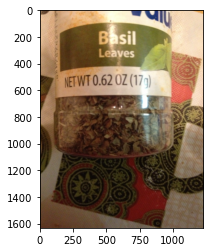

  0%|          | 1/20523 [00:00<1:46:33,  3.21it/s]

{'question_id': 20733, 'question': 'Can you tell me what is in this can please?', 'answer': ['soda', 'coca cola', 'coca cola', 'unsuitable', 'unsuitable', 'coke 0', 'coca cola 0', 'coke 0', 'coca cola', 'coke'], 'image': 'train/VizWiz_train_00000001.jpg', 'dataset': 'vqa'}


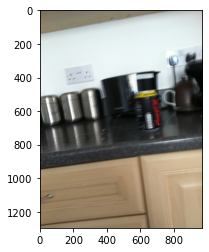

  0%|          | 2/20523 [00:00<1:36:19,  3.55it/s]

{'question_id': 17009, 'question': 'Is this enchilada sauce or is this tomatoes?  Thank you.', 'answer': ['these tomatoes not enchilada sauce', 'tomatoes', 'tomatoes', 'tomatoes', 'tomatoes', 'crushed tomatoes', 'crushed tomatoes', 'tomatoes', 'tomatoes', 'tomatoes'], 'image': 'train/VizWiz_train_00000002.jpg', 'dataset': 'vqa'}


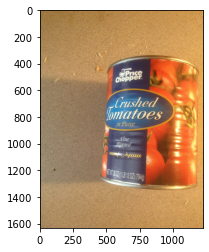

  0%|          | 3/20523 [00:00<1:44:19,  3.28it/s]

{'question_id': 19232, 'question': 'What is the captcha on this screenshot?', 'answer': ['t36m', 't36m', 't36m', 't 3 6 m', 't36m', 't36m', 't36m', 't36m', 't36m', 't63m'], 'image': 'train/VizWiz_train_00000003.jpg', 'dataset': 'vqa'}


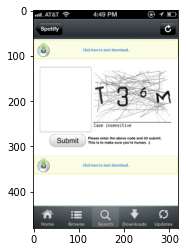

  0%|          | 4/20523 [00:01<1:26:10,  3.97it/s]

{'question_id': 4237, 'question': 'What is this item?', 'answer': ['solar garden light', 'solar garden light', 'solar light', 'solar garden light', 'solar garden light', 'garden light', 'solar garden light', 'solar garden light', 'solar garden light', 'solar garden light'], 'image': 'train/VizWiz_train_00000004.jpg', 'dataset': 'vqa'}


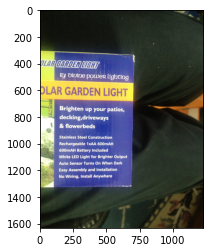

  0%|          | 5/20523 [00:01<1:40:31,  3.40it/s]

{'question_id': 17283, 'question': "What's this?", 'answer': ['boots', 'shoes', 'shoes', 'shoes', 'boots', 'unanswerable', 'feet', 'feet', 'shoes', 'someones feet'], 'image': 'train/VizWiz_train_00000005.jpg', 'dataset': 'vqa'}


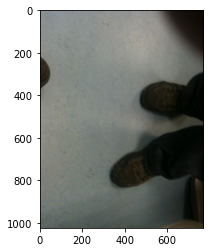

  0%|          | 6/20523 [00:01<1:32:00,  3.72it/s]

{'question_id': 8455, 'question': 'What is in this bottle?', 'answer': ['antiseptic mouthrinse', 'mouthrinse', 'mouthwash', 'mouthrinse', 'advanced antiseptic mouthwash tartar protection citrus flavor', 'antiseptic mouthrinse', 'mouthwash', 'mouthwash', 'mouthwash', 'mouthrinse'], 'image': 'train/VizWiz_train_00000006.jpg', 'dataset': 'vqa'}


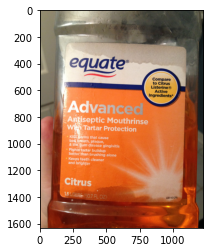

  0%|          | 7/20523 [00:02<1:42:49,  3.33it/s]

{'question_id': 9264, 'question': 'This item.', 'answer': ['monitor cleaning kit', 'monitor cleaning kit', 'cleaning kit', 'monitor cleaning kit', 'monitor cleaning kit', 'monitor cleaner', 'monitor cleaning kit', 'monitor cleaning kit', 'monitor cleaning kit', 'monitor cleaning kit'], 'image': 'train/VizWiz_train_00000007.jpg', 'dataset': 'vqa'}


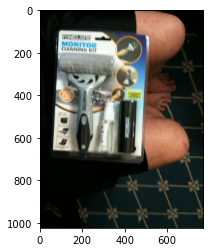

  0%|          | 8/20523 [00:02<1:51:23,  3.07it/s]

{'question_id': 8671, 'question': 'What color do these look?', 'answer': ['orange', 'orange', 'orange', 'pink', 'orange', 'orange', 'pink', 'orange', 'orange', 'orange'], 'image': 'train/VizWiz_train_00000008.jpg', 'dataset': 'vqa'}


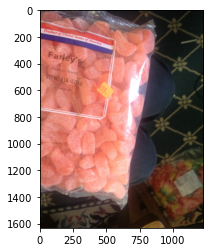

  0%|          | 9/20523 [00:02<1:52:12,  3.05it/s]

{'question_id': 9052, 'question': 'Surface look clean? Thank you.', 'answer': ['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes'], 'image': 'train/VizWiz_train_00000009.jpg', 'dataset': 'vqa'}


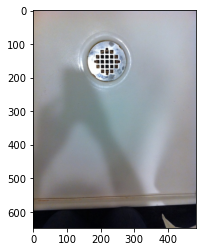

  0%|          | 10/20523 [00:02<1:35:20,  3.59it/s]

{'question_id': 2045, 'question': 'Is this.', 'answer': ['android phone', 'cell phone', 'cell phone', 'cellphone', 'samsung phone', 'unanswerable', 'phone', 'smart phone', 'white smartphone', 'phone'], 'image': 'train/VizWiz_train_00000010.jpg', 'dataset': 'vqa'}


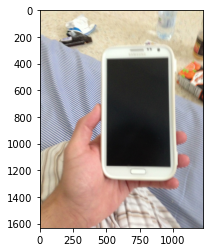

  0%|          | 11/20523 [00:03<1:42:18,  3.34it/s]

{'question_id': 9130, 'question': 'What is the sodium content of this can of food?', 'answer': ['unanswerable', 'unsuitable', 'unanswerable', 'unsuitable', 'unanswerable', 'unsuitable', 'unsuitable', 'unanswerable', 'insufficient photo quality', 'unanswerable'], 'image': 'train/VizWiz_train_00000011.jpg', 'dataset': 'vqa'}


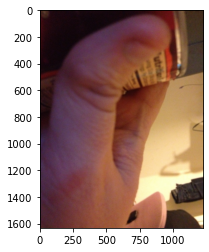

  0%|          | 12/20523 [00:03<1:45:08,  3.25it/s]

{'question_id': 20309, 'question': 'what is this?', 'answer': ['remote', 'remote control', 'jvc dvd vcr remote', 'remote', 'remote', 'remote control', 'remote', 'remote', 'tv remote', 'remote'], 'image': 'train/VizWiz_train_00000012.jpg', 'dataset': 'vqa'}


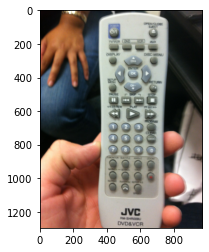

  0%|          | 13/20523 [00:03<1:41:17,  3.37it/s]

{'question_id': 14012, 'question': 'What kind of drink is this?', 'answer': ['soda', 'dr pepper', 'dr pepper', 'soda', 'dr pepper', 'dr pepper', 'energy drink', 'dr pepper', 'dr pepper', 'dr pepper'], 'image': 'train/VizWiz_train_00000013.jpg', 'dataset': 'vqa'}


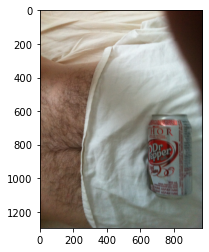

  0%|          | 14/20523 [00:04<1:35:58,  3.56it/s]

{'question_id': 7082, 'question': 'What flavor are these?', 'answer': ['unanswerable', 'unanswerable', 'lemon', 'unanswerable', 'honey', 'unanswerable', 'unsuitable', 'unanswerable', 'unsuitable', 'unanswerable'], 'image': 'train/VizWiz_train_00000014.jpg', 'dataset': 'vqa'}


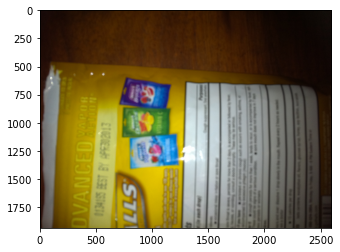

  0%|          | 15/20523 [00:04<2:20:50,  2.43it/s]

{'question_id': 4817, 'question': 'What color... what color is this skirt?', 'answer': ['white', 'grey', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white'], 'image': 'train/VizWiz_train_00000015.jpg', 'dataset': 'vqa'}


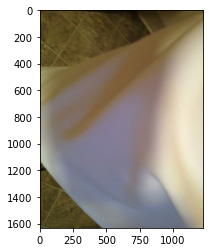

  0%|          | 15/20523 [00:05<1:59:06,  2.87it/s]


In [2]:
import logging
import os
import os.path as op
import json
import base64
import pickle5
from tqdm import tqdm


import torch
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

def generate_lineidx_file(filein, idxout):
    idxout_tmp = idxout + '.tmp'
    with open(filein, 'r') as tsvin, open(idxout_tmp,'w') as tsvout:
        fsize = os.fstat(tsvin.fileno()).st_size
        fpos = 0
        while fpos!=fsize:
            tsvout.write(str(fpos)+"\n")
            tsvin.readline()
            fpos = tsvin.tell()
    os.rename(idxout_tmp, idxout)

class TSVFile(object):
    def __init__(self, tsv_file, generate_lineidx=False):
        self.tsv_file = tsv_file
        self.lineidx = op.splitext(tsv_file)[0] + '.lineidx'
        self._fp = None
        self._lineidx = None
        # the process always keeps the process which opens the file. 
        # If the pid is not equal to the currrent pid, we will re-open the file.
        self.pid = None
        # generate lineidx if not exist
        if not op.isfile(self.lineidx) and generate_lineidx:
            generate_lineidx_file(self.tsv_file, self.lineidx)

    def __del__(self):
        if self._fp:
            self._fp.close()

    def __str__(self):
        return "TSVFile(tsv_file='{}')".format(self.tsv_file)

    def __repr__(self):
        return str(self)

    def num_rows(self):
        self._ensure_lineidx_loaded()
        return len(self._lineidx)

    def seek(self, idx):
        self._ensure_tsv_opened()
        self._ensure_lineidx_loaded()
        try:
            pos = self._lineidx[idx]
        except:
            logging.info('{}-{}'.format(self.tsv_file, idx))
            raise
        self._fp.seek(pos)
        return [s.strip() for s in self._fp.readline().split('\t')]

    def seek_first_column(self, idx):
        self._ensure_tsv_opened()
        self._ensure_lineidx_loaded()
        pos = self._lineidx[idx]
        self._fp.seek(pos)
        print(self._fp)
        return read_to_character(self._fp, '\t')

    def __getitem__(self, index):
        return self.seek(index)

    def __len__(self):
        return self.num_rows()

    def _ensure_lineidx_loaded(self):
        if self._lineidx is None:
            logging.info('loading lineidx: {}'.format(self.lineidx))
            with open(self.lineidx, 'r') as fp:
                self._lineidx = [int(i.strip()) for i in fp.readlines()]

    def _ensure_tsv_opened(self):
        if self._fp is None:
            self._fp = open(self.tsv_file, 'r')
            self.pid = os.getpid()

        if self.pid != os.getpid():
            logging.info('re-open {} because the process id changed'.format(self.tsv_file))
            self._fp = open(self.tsv_file, 'r')
            self.pid = os.getpid()

train36_imgid2idx = pickle5.load(open("./imgids/train36_imgid2idx.pkl", 'rb'))
train_target = pickle5.load(open("./cache/train_target.pkl", 'rb'))
with open("./Annotations/train.json", "r") as f:
    train_ann = json.load(f)

output_json = []
    
for i in tqdm(range(len(train_target))):
    img_vis = Image.open(os.path.join("/home/datasets/VizWiz/train", train_target[i]['image']))
    # print(os.path.join("/home/datasets/VizWiz/val", val_target[i]['image']))
    img_id = train36_imgid2idx[train_target[i]['image'].split('.')[0]]
    ans = [dicts['answer'] for dicts in train_ann[i]['answers']]
    unit = {
        'question_id' : img_id,
        'question' : train_ann[i]['question'],
        'answer' : ans,
        'image' : os.path.join('train', train_ann[i]['image']),
        'dataset' : 'vqa'
    }
    
    output_json.append(unit)
    plt.imshow(img_vis)
    print(unit)
    plt.show()
    if i>=15:
        break
    
# with open("./train_vizwiz_albef.json", "w") as f:
#     json.dump(output_json, f)
    

# 创建 ALBEF 验证集

  0%|          | 0/4319 [00:00<?, ?it/s]

{'question_id': 697, 'question': 'Ok. There is another picture I hope it is a better one.', 'answer': ['unanswerable', 'unanswerable', 'unanswerable', 'unanswerable', 'unanswerable', 'unanswerable', 'unanswerable', 'unanswerable', 'cannot repair this computer automatically', 'blank screen'], 'image': 'val/VizWiz_val_00000000.jpg', 'dataset': 'vqa'}
{}


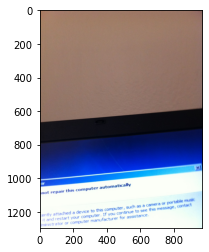

  0%|          | 1/4319 [00:00<16:25,  4.38it/s]

{'question_id': 4188, 'question': 'Can you tell me what this medicine is please?', 'answer': ['no', 'unsuitable image', 'night time', 'unsuitable image', 'night time', 'night time cold medicine', 'night time', 'night time', 'night time', 'night time medicine'], 'image': 'val/VizWiz_val_00000001.jpg', 'dataset': 'vqa'}
{}


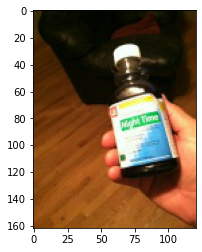

  0%|          | 2/4319 [00:00<11:03,  6.51it/s]

{'question_id': 6741, 'question': 'What is the title of this book? ', 'answer': ['dog years', 'dog years: memoir', 'dog years', 'dog years', 'dog years', 'dog years', 'dog years', 'dog years', 'dog years', 'dog years'], 'image': 'val/VizWiz_val_00000002.jpg', 'dataset': 'vqa'}
{}


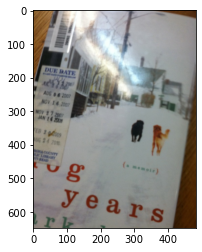

  0%|          | 3/4319 [00:00<09:59,  7.20it/s]

{'question_id': 4996, 'question': 'Which one is the blue one?', 'answer': ['right', 'right', 'right', 'omni sorb', 'right', '1 on right', 'on right', 'right', 'right 1', 'right 1'], 'image': 'val/VizWiz_val_00000003.jpg', 'dataset': 'vqa'}
{}


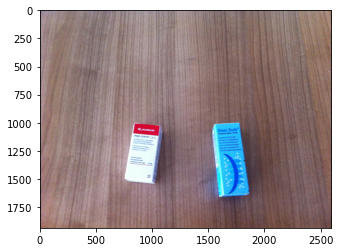

  0%|          | 4/4319 [00:01<23:33,  3.05it/s]

{'question_id': 2970, 'question': 'What does the arrow say?', 'answer': ['unanswerable', 'unanswerable', 'zoomtext', 'unanswerable', 'unanswerable', 'unanswerable', 'unanswerable', 'unanswerable', 'unanswerable', 'zoomtext'], 'image': 'val/VizWiz_val_00000004.jpg', 'dataset': 'vqa'}
{}


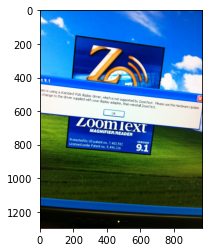

  0%|          | 5/4319 [00:01<21:01,  3.42it/s]

{'question_id': 1964, 'question': 'What the screen says? Thank you.', 'answer': ['unsuitable image', 'unsuitable image', 'dell', 'windows 7', 'windows 7', 'dell windows home premium', 'windows 7 home premium', 'windows 7', 'unsuitable image', 'windows dell'], 'image': 'val/VizWiz_val_00000005.jpg', 'dataset': 'vqa'}
{}


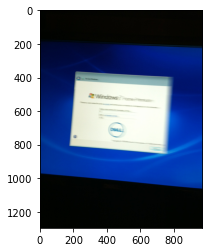

  0%|          | 5/4319 [00:01<21:35,  3.33it/s]


In [8]:
import logging
import os
import os.path as op
import json
import base64
import pickle5
from tqdm import tqdm


import torch
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

def generate_lineidx_file(filein, idxout):
    idxout_tmp = idxout + '.tmp'
    with open(filein, 'r') as tsvin, open(idxout_tmp,'w') as tsvout:
        fsize = os.fstat(tsvin.fileno()).st_size
        fpos = 0
        while fpos!=fsize:
            tsvout.write(str(fpos)+"\n")
            tsvin.readline()
            fpos = tsvin.tell()
    os.rename(idxout_tmp, idxout)

class TSVFile(object):
    def __init__(self, tsv_file, generate_lineidx=False):
        self.tsv_file = tsv_file
        self.lineidx = op.splitext(tsv_file)[0] + '.lineidx'
        self._fp = None
        self._lineidx = None
        # the process always keeps the process which opens the file. 
        # If the pid is not equal to the currrent pid, we will re-open the file.
        self.pid = None
        # generate lineidx if not exist
        if not op.isfile(self.lineidx) and generate_lineidx:
            generate_lineidx_file(self.tsv_file, self.lineidx)

    def __del__(self):
        if self._fp:
            self._fp.close()

    def __str__(self):
        return "TSVFile(tsv_file='{}')".format(self.tsv_file)

    def __repr__(self):
        return str(self)

    def num_rows(self):
        self._ensure_lineidx_loaded()
        return len(self._lineidx)

    def seek(self, idx):
        self._ensure_tsv_opened()
        self._ensure_lineidx_loaded()
        try:
            pos = self._lineidx[idx]
        except:
            logging.info('{}-{}'.format(self.tsv_file, idx))
            raise
        self._fp.seek(pos)
        return [s.strip() for s in self._fp.readline().split('\t')]

    def seek_first_column(self, idx):
        self._ensure_tsv_opened()
        self._ensure_lineidx_loaded()
        pos = self._lineidx[idx]
        self._fp.seek(pos)
        print(self._fp)
        return read_to_character(self._fp, '\t')

    def __getitem__(self, index):
        return self.seek(index)

    def __len__(self):
        return self.num_rows()

    def _ensure_lineidx_loaded(self):
        if self._lineidx is None:
            logging.info('loading lineidx: {}'.format(self.lineidx))
            with open(self.lineidx, 'r') as fp:
                self._lineidx = [int(i.strip()) for i in fp.readlines()]

    def _ensure_tsv_opened(self):
        if self._fp is None:
            self._fp = open(self.tsv_file, 'r')
            self.pid = os.getpid()

        if self.pid != os.getpid():
            logging.info('re-open {} because the process id changed'.format(self.tsv_file))
            self._fp = open(self.tsv_file, 'r')
            self.pid = os.getpid()

val36_imgid2idx = pickle5.load(open("./imgids/val36_imgid2idx.pkl", 'rb'))
val_target = pickle5.load(open("./cache/val_target.pkl", 'rb'))
with open("./Annotations/val.json", "r") as f:
    val_ann = json.load(f)

output_json = []
    
for i in tqdm(range(len(val_target))):
    img_vis = Image.open(os.path.join("/home/datasets/VizWiz/val", val_target[i]['image']))
    # print(os.path.join("/home/datasets/VizWiz/val", val_target[i]['image']))
    img_id = val36_imgid2idx[val_target[i]['image'].split('.')[0]]
    ans = [dicts['answer'] for dicts in val_ann[i]['answers']]
    unit = {
        'question_id' : img_id,
        'question' : val_ann[i]['question'],
        'answer' : ans,
        'image' : os.path.join('val', val_ann[i]['image']),
        'dataset' : 'vqa'
    }
    
    output_json.append(unit)
    plt.imshow(img_vis)
    print(unit)
    print(features)
    plt.show()
    if i>=5:
        break
    
# with open("./val_vizwiz_albef.json", "w") as f:
#     json.dump(output_json, f)
    

# 创建 ALBEF 测试集

  0%|          | 0/8000 [00:00<?, ?it/s]

{'question_id': '0', 'question': 'What is this? And what color is it?', 'image': 'test/VizWiz_test_00000000.jpg', 'dataset': 'vqa'}
{}


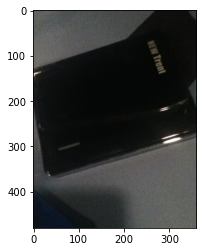

  0%|          | 1/8000 [00:00<22:53,  5.82it/s]

{'question_id': '1', 'question': 'What is this?', 'image': 'test/VizWiz_test_00000001.jpg', 'dataset': 'vqa'}
{}


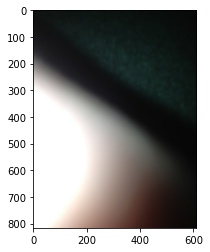

  0%|          | 2/8000 [00:00<21:57,  6.07it/s]

{'question_id': '2', 'question': 'Has this oven gotten up to four hundred fifty degrees Fahrenheit yet?', 'image': 'test/VizWiz_test_00000002.jpg', 'dataset': 'vqa'}
{}


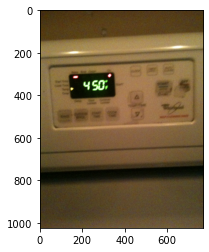

  0%|          | 3/8000 [00:00<22:46,  5.85it/s]

{'question_id': '3', 'question': 'What is this?', 'image': 'test/VizWiz_test_00000003.jpg', 'dataset': 'vqa'}
{}


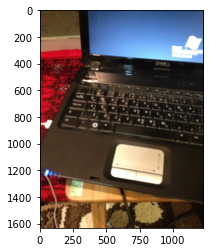

  0%|          | 4/8000 [00:00<30:20,  4.39it/s]

{'question_id': '4', 'question': 'What is this?', 'image': 'test/VizWiz_test_00000004.jpg', 'dataset': 'vqa'}
{}


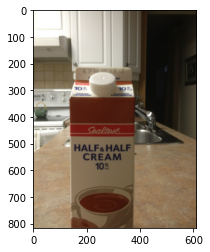

  0%|          | 5/8000 [00:00<27:08,  4.91it/s]

{'question_id': '5', 'question': 'What kind of key is this?', 'image': 'test/VizWiz_test_00000005.jpg', 'dataset': 'vqa'}
{}


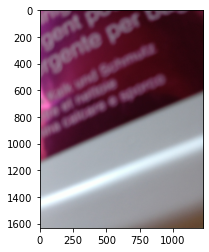

  0%|          | 5/8000 [00:01<33:53,  3.93it/s]


In [11]:
import logging
import os
import os.path as op
import json
import base64
from tqdm import tqdm

import torch
import numpy as np

def generate_lineidx_file(filein, idxout):
    idxout_tmp = idxout + '.tmp'
    with open(filein, 'r') as tsvin, open(idxout_tmp,'w') as tsvout:
        fsize = os.fstat(tsvin.fileno()).st_size
        fpos = 0
        while fpos!=fsize:
            tsvout.write(str(fpos)+"\n")
            tsvin.readline()
            fpos = tsvin.tell()
    os.rename(idxout_tmp, idxout)

class TSVFile(object):
    def __init__(self, tsv_file, generate_lineidx=False):
        self.tsv_file = tsv_file
        self.lineidx = op.splitext(tsv_file)[0] + '.lineidx'
        self._fp = None
        self._lineidx = None
        # the process always keeps the process which opens the file. 
        # If the pid is not equal to the currrent pid, we will re-open the file.
        self.pid = None
        # generate lineidx if not exist
        if not op.isfile(self.lineidx) and generate_lineidx:
            generate_lineidx_file(self.tsv_file, self.lineidx)

    def __del__(self):
        if self._fp:
            self._fp.close()

    def __str__(self):
        return "TSVFile(tsv_file='{}')".format(self.tsv_file)

    def __repr__(self):
        return str(self)

    def num_rows(self):
        self._ensure_lineidx_loaded()
        return len(self._lineidx)

    def seek(self, idx):
        self._ensure_tsv_opened()
        self._ensure_lineidx_loaded()
        try:
            pos = self._lineidx[idx]
        except:
            logging.info('{}-{}'.format(self.tsv_file, idx))
            raise
        self._fp.seek(pos)
        return [s.strip() for s in self._fp.readline().split('\t')]

    def seek_first_column(self, idx):
        self._ensure_tsv_opened()
        self._ensure_lineidx_loaded()
        pos = self._lineidx[idx]
        self._fp.seek(pos)
        print(self._fp)
        return read_to_character(self._fp, '\t')

    def __getitem__(self, index):
        return self.seek(index)

    def __len__(self):
        return self.num_rows()

    def _ensure_lineidx_loaded(self):
        if self._lineidx is None:
            logging.info('loading lineidx: {}'.format(self.lineidx))
            with open(self.lineidx, 'r') as fp:
                self._lineidx = [int(i.strip()) for i in fp.readlines()]

    def _ensure_tsv_opened(self):
        if self._fp is None:
            self._fp = open(self.tsv_file, 'r')
            self.pid = os.getpid()

        if self.pid != os.getpid():
            logging.info('re-open {} because the process id changed'.format(self.tsv_file))
            self._fp = open(self.tsv_file, 'r')
            self.pid = os.getpid()

with open("./SG-Bottom-up-features/test_output/image_id2idx.json", 'r') as f:
    imgid2img = json.load(f)
img2imgid = {value : key for key, value in imgid2img.items()}

with open("./Annotations/test.json", "r") as f:
    test_ann = json.load(f)

test_features = TSVFile("./SG-Bottom-up-features/test_output/features.tsv")
test_labels = TSVFile("./SG-Bottom-up-features/test_output/labels.tsv")

features = {}
output_json = []

for i in tqdm(range(len(test_features))):
    img_vis = Image.open(os.path.join("/home/datasets/VizWiz/test", test_ann[i]['image']))
    img_name_feature, feature_num, feature = test_features.seek(i) 
    img_id = img2imgid[img_name_feature]
    unit = {
        'question_id': img_id,
        'question' : test_ann[i]['question'],
        'image' : os.path.join('test', test_ann[i]['image']),
        'dataset' : 'vqa'
    }
    
    plt.imshow(img_vis)
    print(unit)
    print(features)
    plt.show()
    if i>=5:
        break
    output_json.append(unit)

# with open("./test_vizwiz_albef.json", "w") as f:
#     json.dump(output_json, f)

    

# 创建 answer_list

In [5]:
import json
import _pickle as cPickle

label2ans = cPickle.load(open("./cache/trainval_label2ans.pkl", 'rb'))
print(len(label2ans))
list(label2ans)
with open('./vizwiz_answer_list.json', 'w') as f:
    json.dump(label2ans, f)

2770
